<div style="
  display: flex;
  flex-direction: column;
  align-items: center;
  justify-content: center;
  background: linear-gradient(135deg, #2F4B43, #4F6F65);
  padding: 40px 20px;
  border-radius: 15px;
  box-shadow: 0 2px 10px rgba(0,0,0,0.1);
  text-align: center;
  font-family: 'Segoe UI', sans-serif;
">
  <div>
    <h1 style="
      color: #EF4635;  /* Command A Vision red */
      font-weight: 800;
      font-size: 34px;
      margin: 0 0 12px 0;
    ">
      📑 Testing Cohere <span style="color: #33DDE0;">Command A Vision</span> on Table Structure Recognition & Extraction
    </h1>
    <p style="
      color: #f0f0f0;
      font-size: 18px;
      margin: 0;
      max-width: 700px;
    ">
      Exploring its capability to detect, understand, and convert tables into structured formats across diverse document layouts.
    </p>
  </div>
</div>

## **Introduction** <a id="introduction"></a>

[Cohere Command A Vision](https://huggingface.co/CohereLabs/command-a-vision-07-2025?ref=cohere-ai.ghost.io) is a state-of-the-art open-weight vision-language model released by Cohere in July 2025. Built on the Command R+ foundation, it is designed for advanced enterprise-level image understanding tasks including document parsing, OCR, and structured data extraction.

According to [Cohere’s official announcement](https://cohere.com/blog/command-a-vision), Command A Vision demonstrates impressive performance across multiple visual reasoning benchmarks, such as DocVQA, OCRBench, and AI2D. This notebook focuses specifically on evaluating the model’s effectiveness in **table understanding and extraction**. Through real-world examples, we assess its ability to detect table structures, interpret cell-level data, and convert them into accurate markdown or structured formats.

By concentrating on this use case, we aim to understand the model's practical value in automating workflows for document intelligence, data mining, and enterprise reporting from unstructured or semi-structured visual sources.

# 📑 Table of Contents

1. [Introduction](#introduction)
2. [Install Libraries](#1-install-libraries)
3. [Import Libraries](#2-import-libraries)
4. [Inference](#3-inference)
   - [Example n°1](#example-n°1)
   - [Example n°2](#example-n°2)
   - [Example n°3](#example-n°3)
   - [Example n°4](#example-n°4)
   - [Example n°5](#example-n°5)
   - [Example n°6](#example-n°6)
   - [Example n°7](#example-n°7)
   - [Example n°8](#example-n°8)
   - [Example n°9](#example-n°9)
   - [Example n°10](#example-n°10)
   - [Example n°11](#example-n°11)
5. [Conclusion](#conclusion)

# **1. Install Libraries** <a id="1-install-libraries"></a>

In [2]:
%%capture
! pip install cohere
! pip install markdown2

# **2. Import Libraries** <a id="2-import-libraries"></a>

In [3]:
import cohere

import logging
import time
from pathlib import Path
import pandas as pd
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
from PIL import Image
import os
import re

from IPython.display import display, HTML
import base64

import io
from io import BytesIO, StringIO

import warnings
import sys
import contextlib
import json
from rich.pretty import pprint
from rich.table import Table
from rich.markdown import Markdown
import base64
import markdown
import markdown2

import pandas as pd

# **3. Inference** <a id="3-inference"></a>

In [4]:
def markdown_table_to_html(markdown_text):
    match = re.search(r"\|.*?\|\n(\|[-| ]+\|\n)?((?:\|.*\|\n?)+)", markdown_text, re.DOTALL)
    if not match:
        raise ValueError("No markdown table found.")

    lines = match.group(0).strip().splitlines()
    header = [col.strip() for col in lines[0].split('|')[1:-1]]
    rows = [
        [col.strip() for col in row.split('|')[1:-1]]
        for row in lines[2:]  # Skip header and separator
    ]
    df = pd.DataFrame(rows, columns=header)
    return df.to_html(index=False, escape=False)

In [5]:
def display_results(image_path, result):
    with open(image_path, "rb") as f:
        img_data = f.read()
    img_base64 = base64.b64encode(img_data).decode()

    # Build HTML layout
    html_content = f"""
    <style>
        .flex-container {{
            display: flex;
            gap: 20px;
            align-items: flex-start;
        }}
        .image-box {{
            flex: 1.1;
        }}
        .image-box img {{
            width: 100%;
            max-width: 650px;
            border-radius: 6px;
        }}
        .table-box {{
            flex: 1.2;
            padding: 0px;
            border-radius: 0px;
            overflow-x: auto;
        }}
        h3 {{
            margin-bottom: 10px;
        }}
    </style>

    <div class="flex-container">
        <div class="image-box">
            <h3>📄 Input Document Page</h3>
            <img src="data:image/png;base64,{img_base64}"/>
        </div>
        <div class="table-box">
            <h3>📊 Extracted Table</h3>
            {result}
        </div>
    </div>
    """

    display(HTML(html_content))

In [7]:
def generate_text(image_path, message):

    model = "command-a-vision-07-2025"

    co = cohere.ClientV2("********************************")

    with open(image_path, "rb") as img_file:
        base64_image_url = f"data:image/jpeg;base64,{base64.b64encode(img_file.read()).decode('utf-8')}"

    response = co.chat(
        model=model,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": message},
                    {
                        "type": "image_url",
                        "image_url": {"url": base64_image_url},
                    },
                ],
            }
        ],
        temperature=0.3,
    )
    
    #return response.message.content[0].text
    html_table = markdown_table_to_html(response.message.content[0].text)
    display_results(image_path, html_table)

In [8]:
prompt = (
    "Extract the table from the given image and convert it into a structured markdown table. "
    "Ensure that the table headers, rows, columns, and all cell values are accurately captured and preserved. "
    "Maintain the original layout and semantic structure of the table as seen in the image."
)

## **Example n°1** <a id="example-n1"></a>


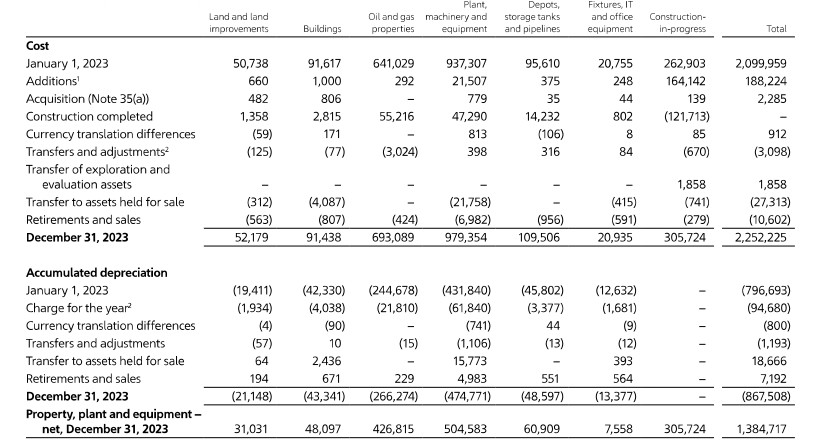

In [9]:
generate_text("/kaggle/input/tables-different-cases-cropped/aramco_table_1.jpg",
             prompt)

## **Example n°2** <a id="example-n2"></a>


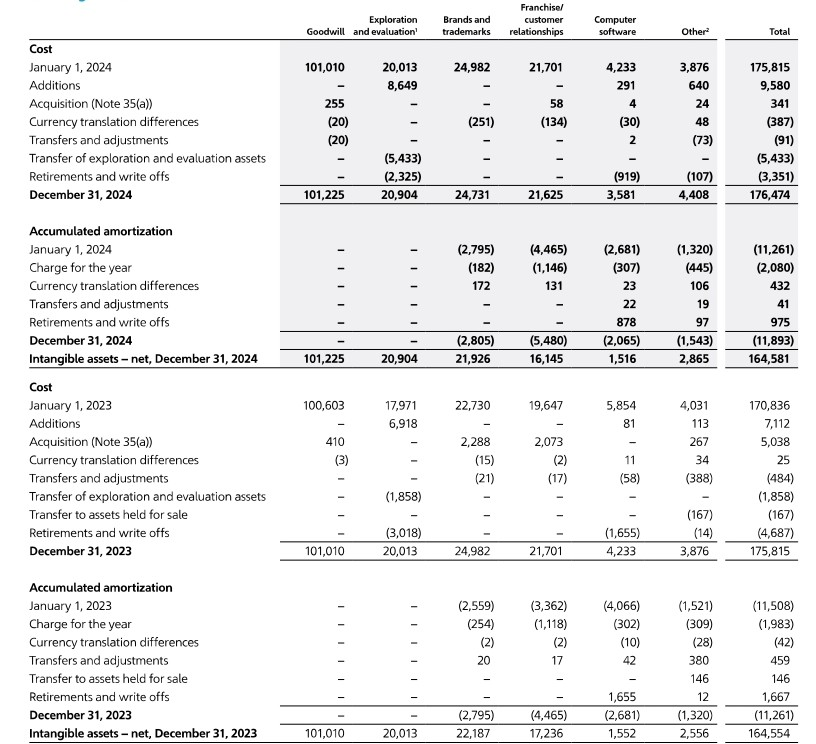

In [10]:
generate_text("/kaggle/input/tables-different-cases-cropped/aramco_table_3.jpg",
             prompt)

## **Example n°3** <a id="example-n3"></a>


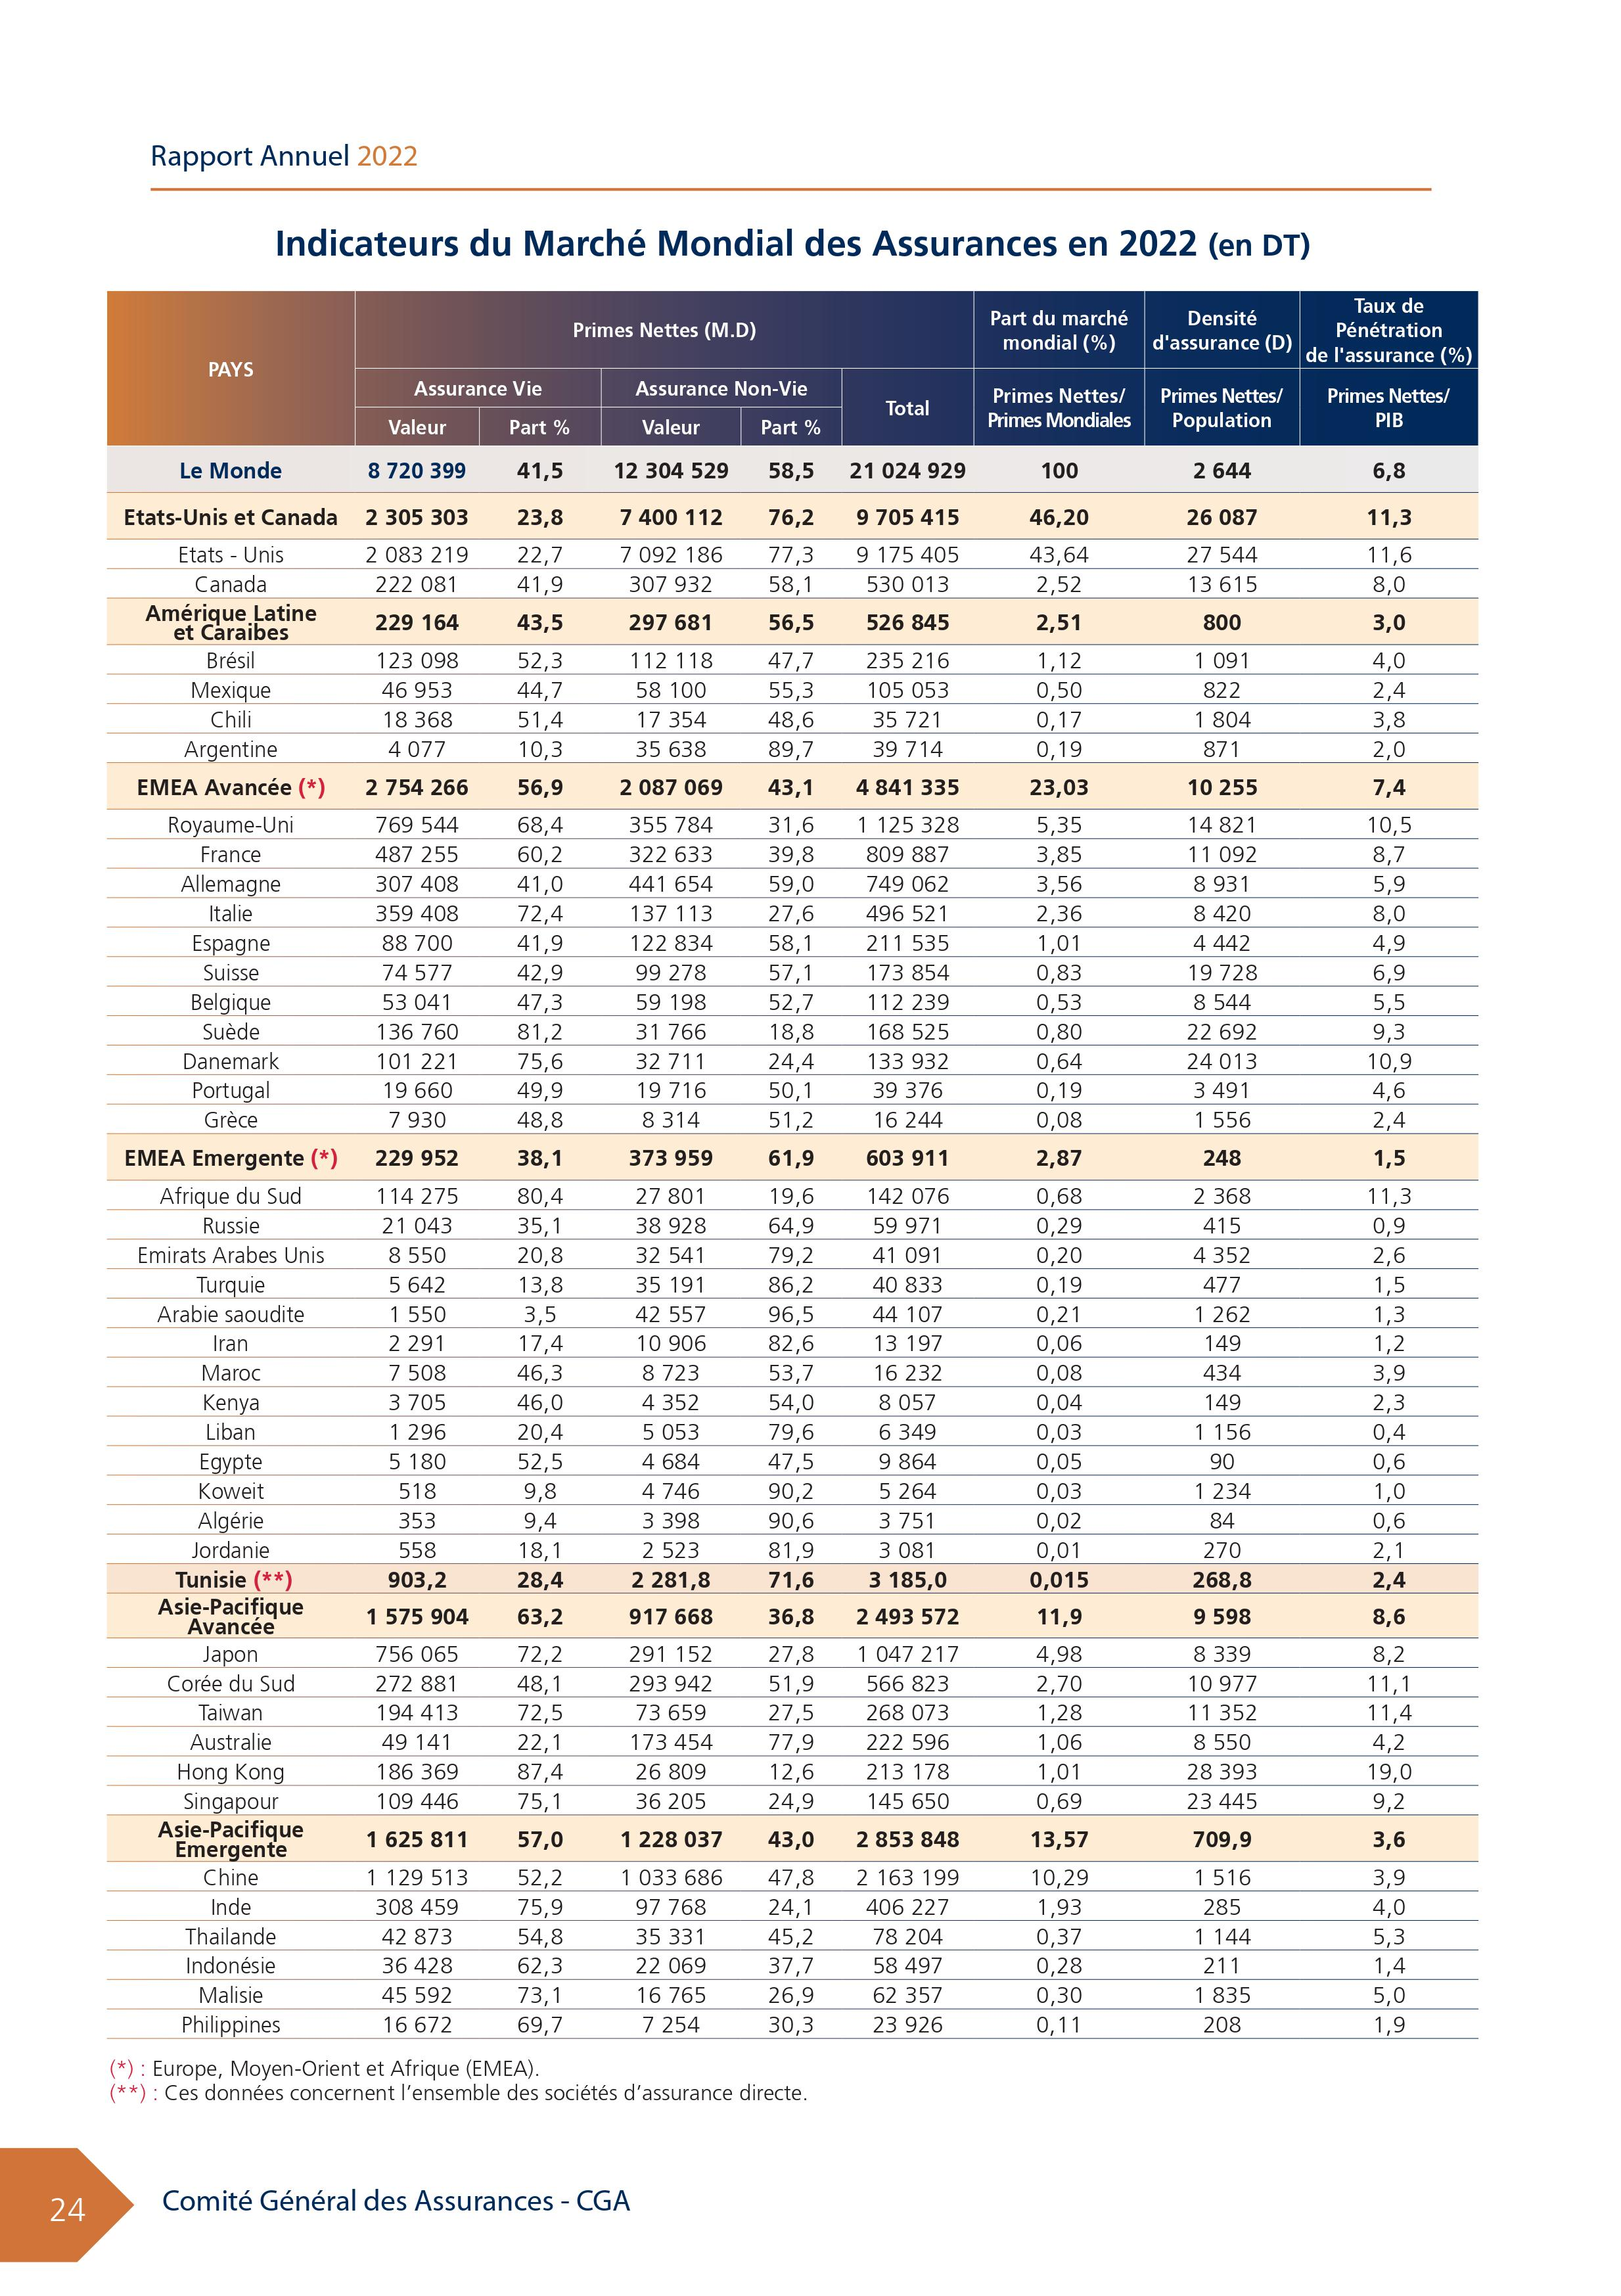

In [15]:
generate_text("/kaggle/input/different-tables-images-testing/other_table.jpg",
             prompt)

## **Example n°4** <a id="example-n4"></a>


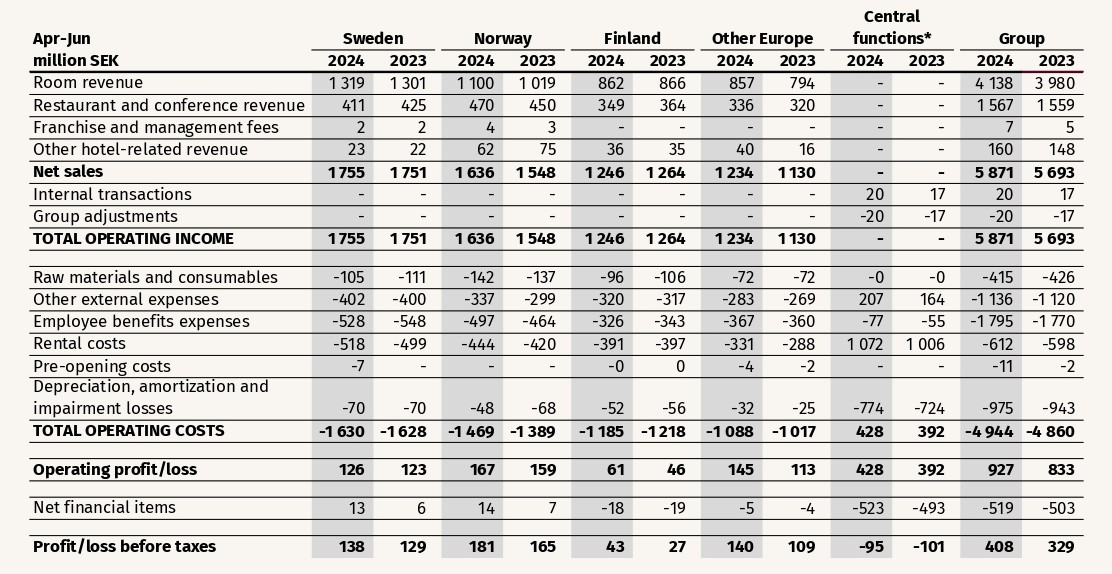

In [16]:
generate_text("/kaggle/input/tables-different-cases-cropped/the-full-report-pdf_page-0026_cropped.jpg",
             prompt)

## **Example n°5** <a id="example-n5"></a>


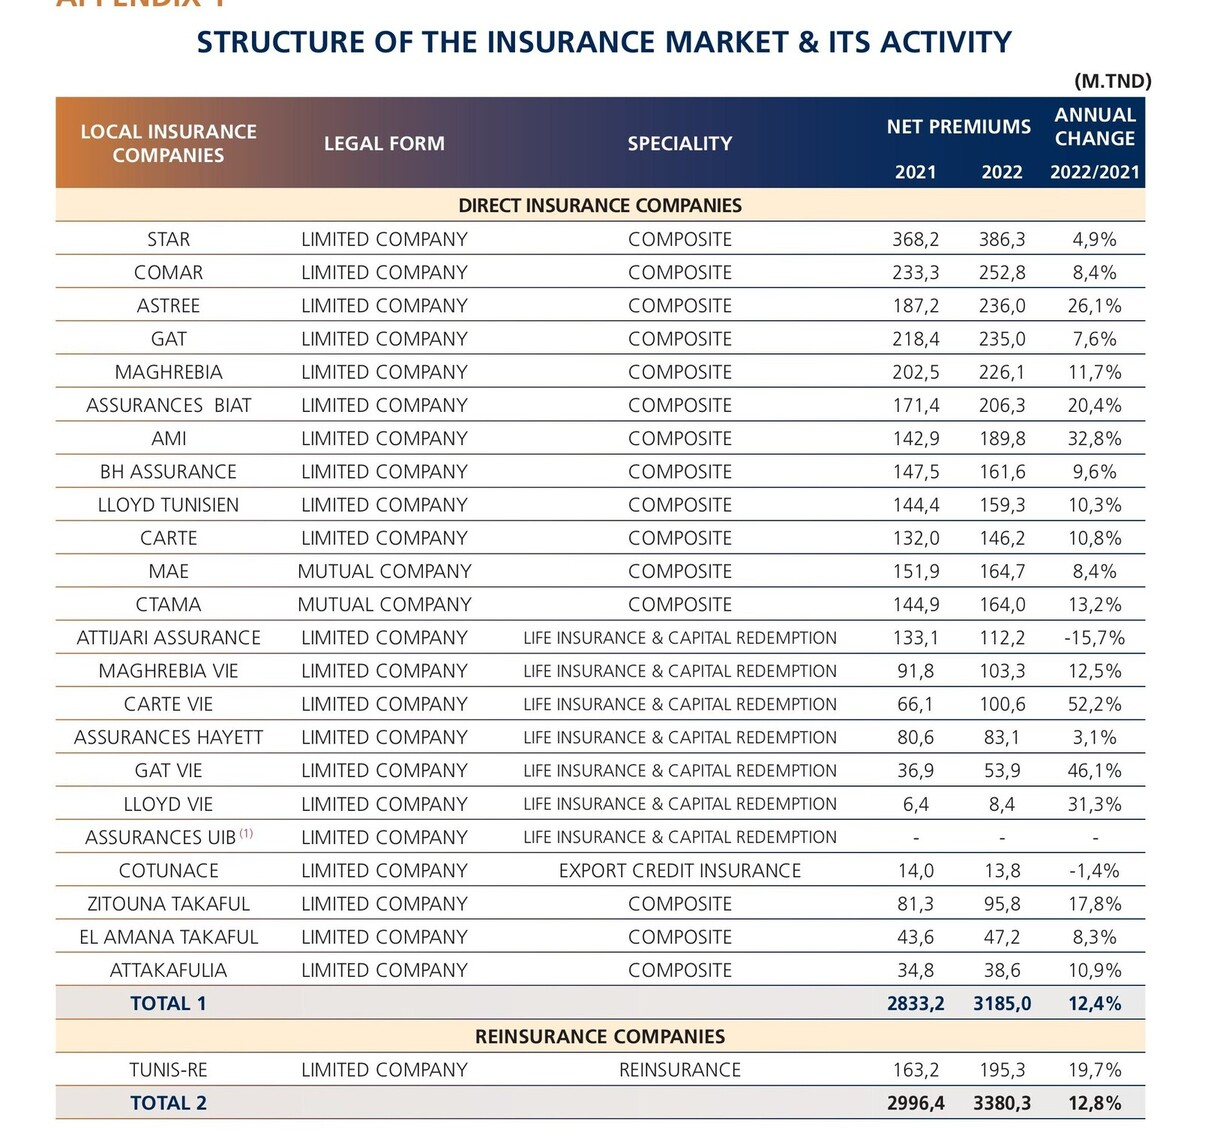

In [13]:
generate_text("/kaggle/input/cga-images/RAP_CGA_FR_ANG_2022-images-79 (1) (1).jpg",
             prompt)

## **Example n°6** <a id="example-n6"></a>


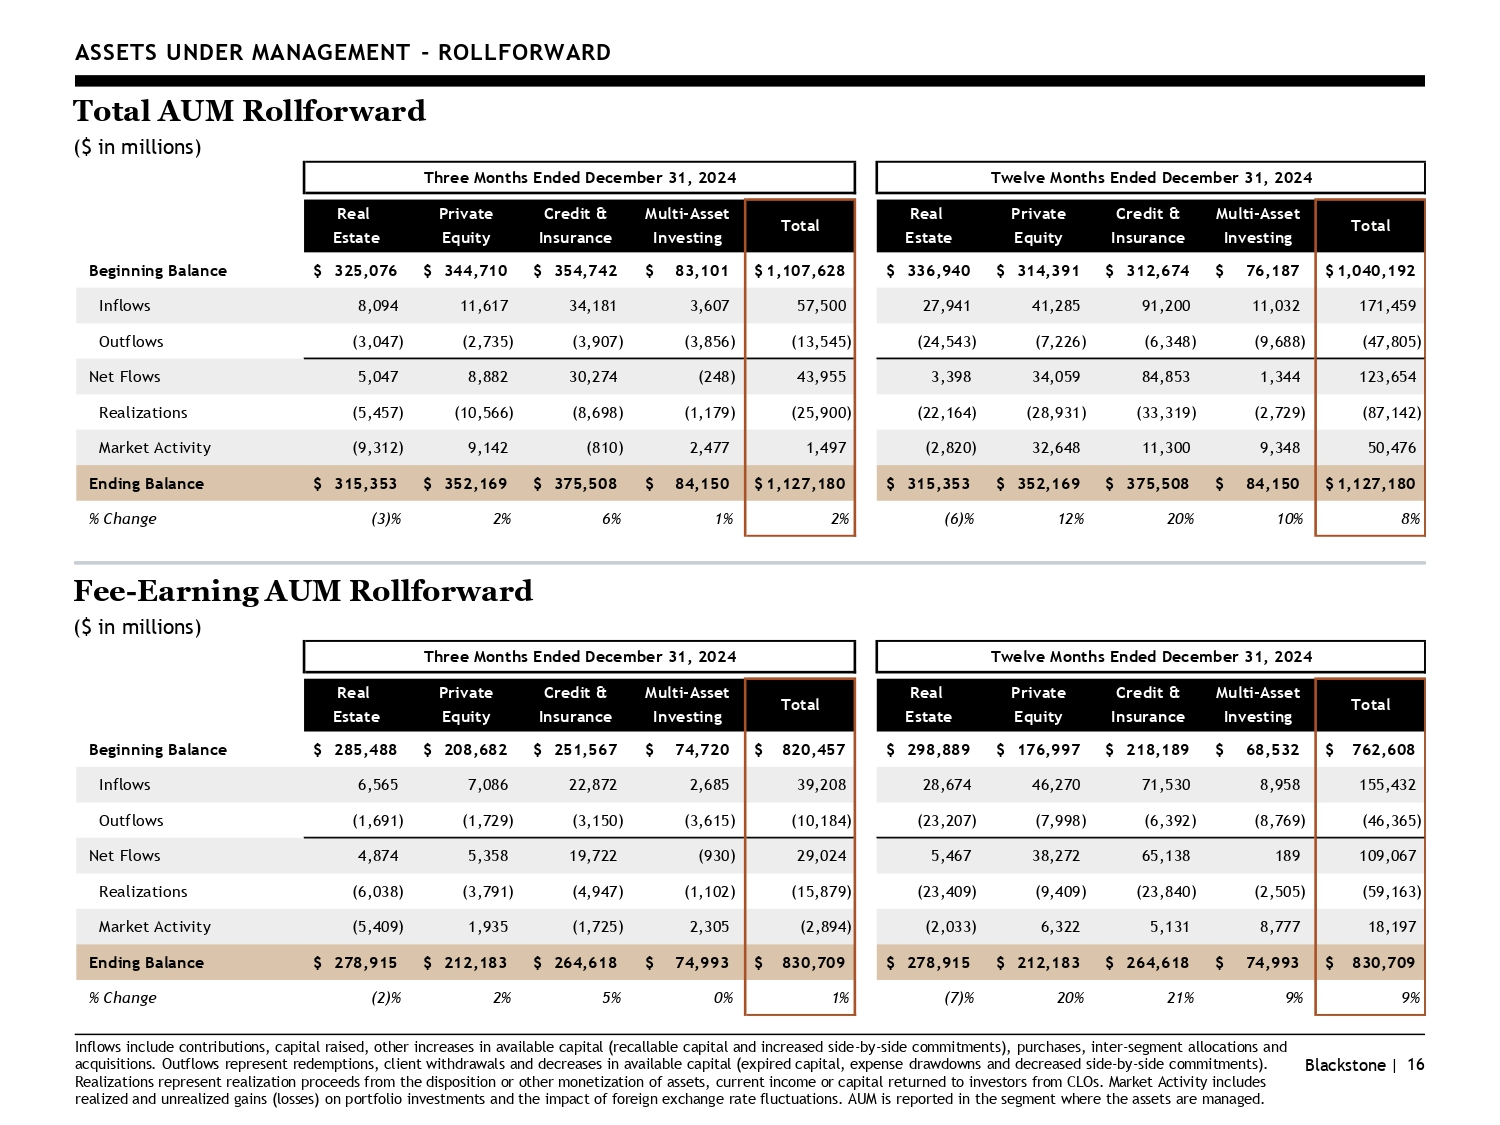

In [18]:
generate_text("/kaggle/input/pdf-files-pages/Blackstone4Q24EarningsPressRelease_page-0020.jpg",
             prompt)

## **Example n°7** <a id="example-n7"></a>


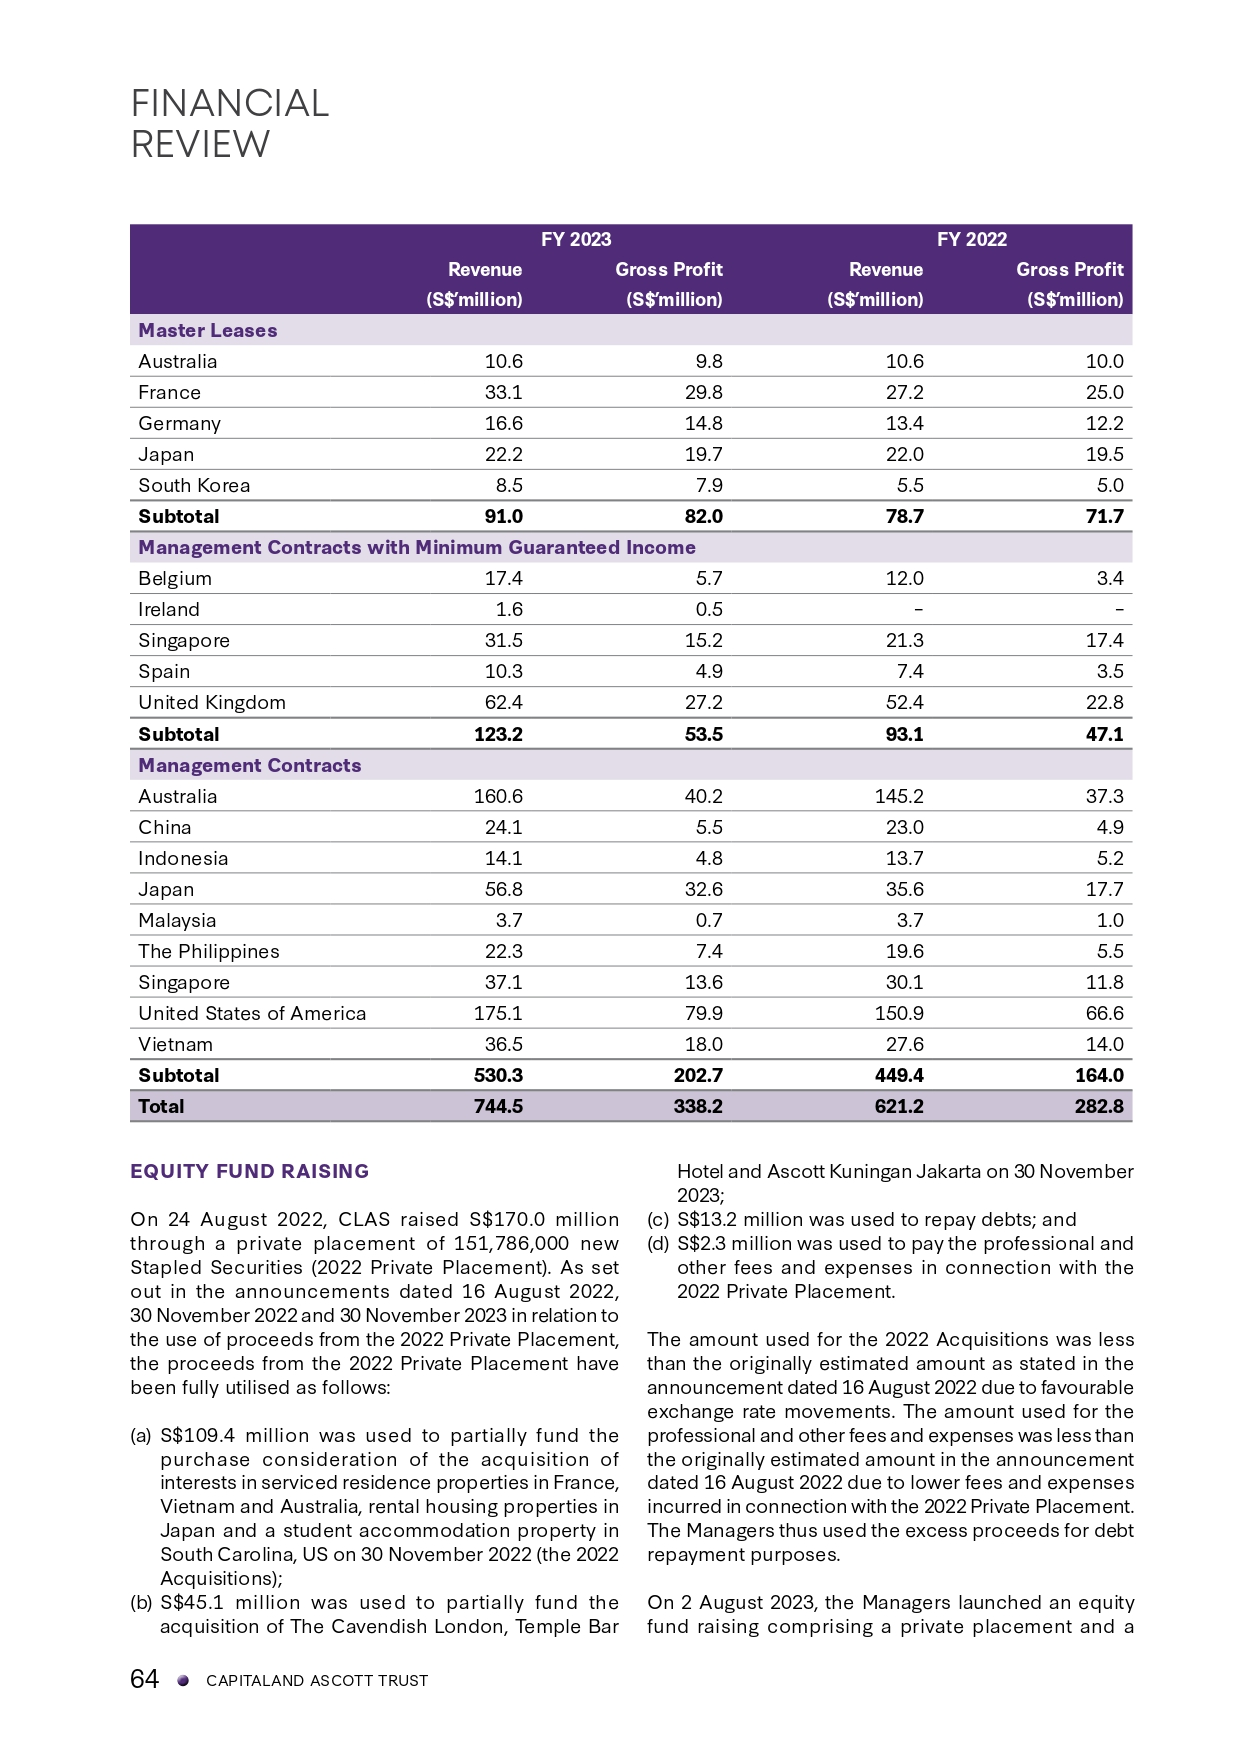

In [19]:
generate_text("/kaggle/input/pdf-files-pages/CLAS-FY2023-AR_page-0066.jpg",
             prompt)

## **Example n°8** <a id="example-n8"></a>


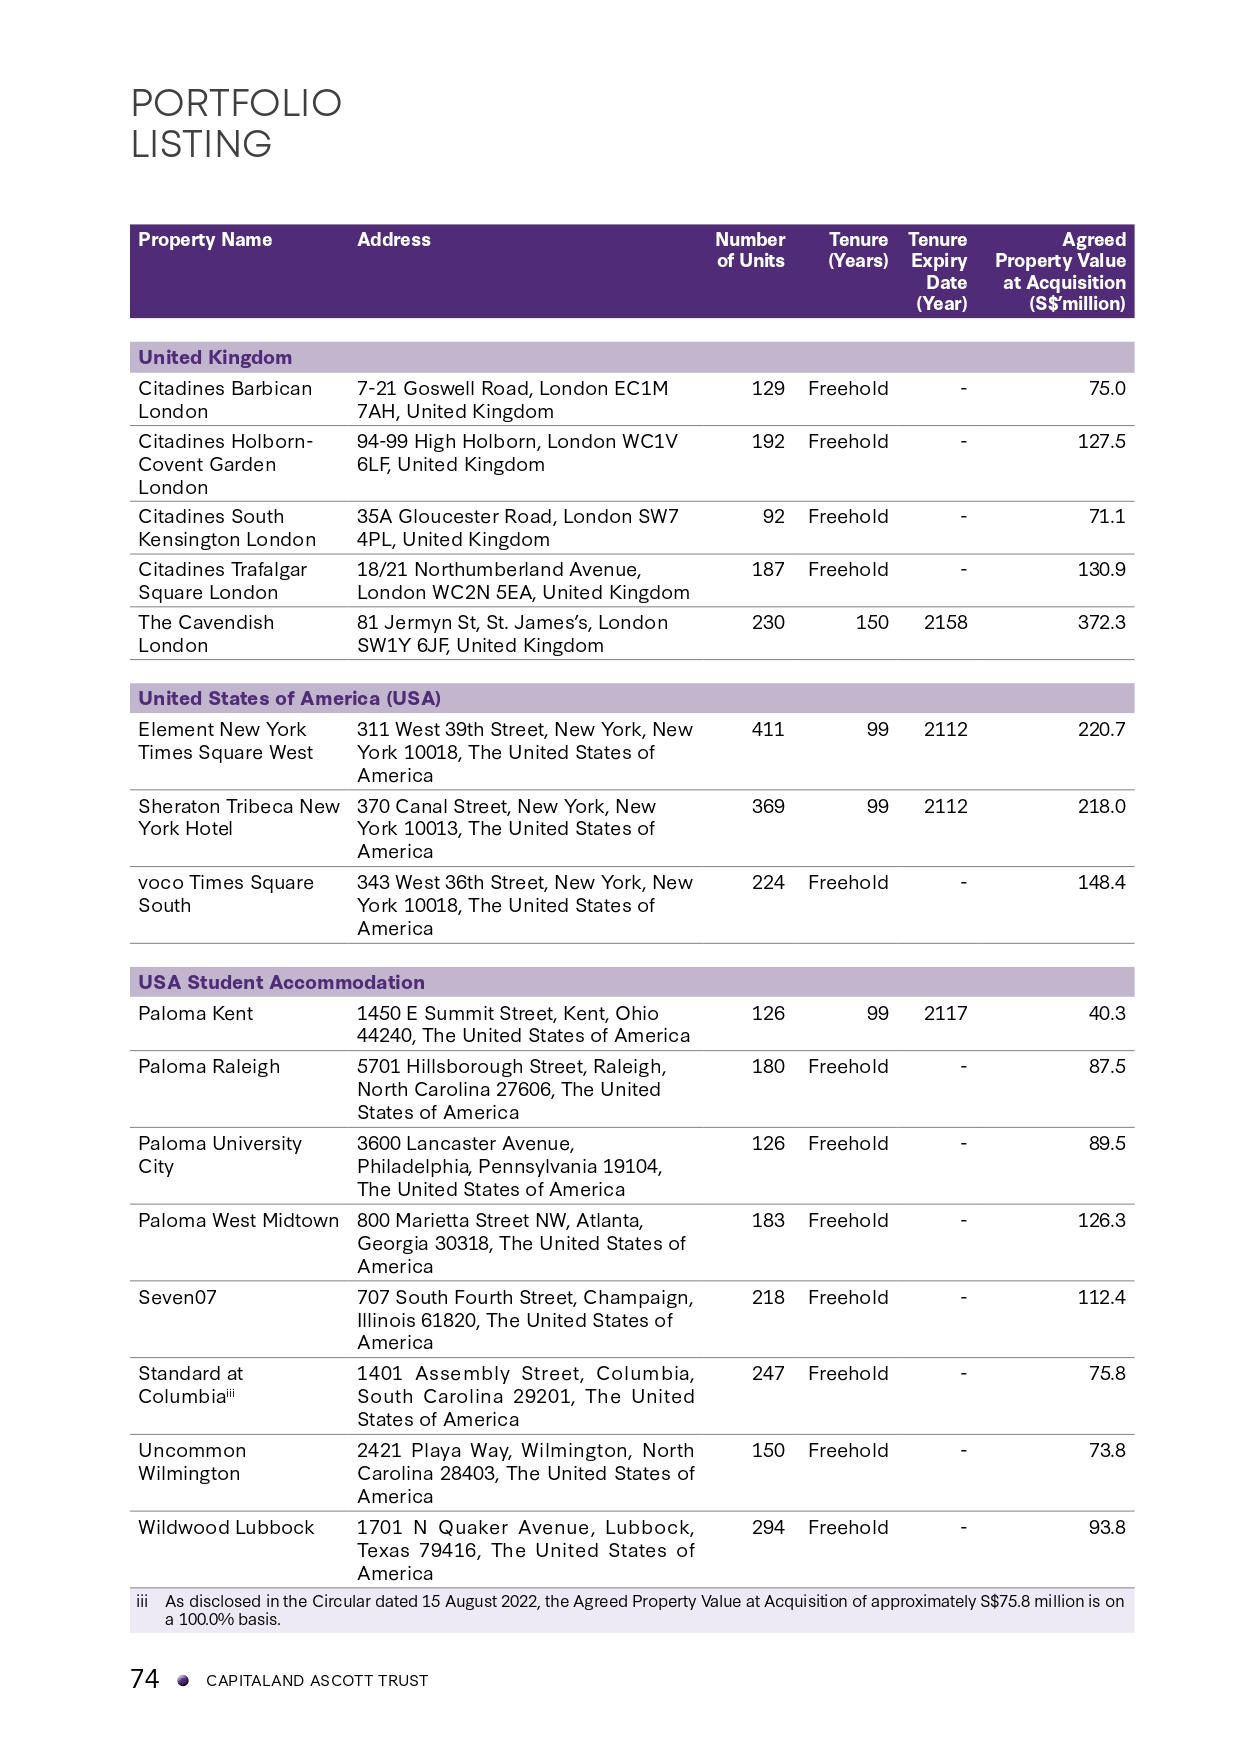

In [21]:
generate_text("/kaggle/input/pdf-files-pages/CLAS-FY2023-AR_page-0076.jpg",
             prompt)

## **Example n°9** <a id="example-n9"></a>


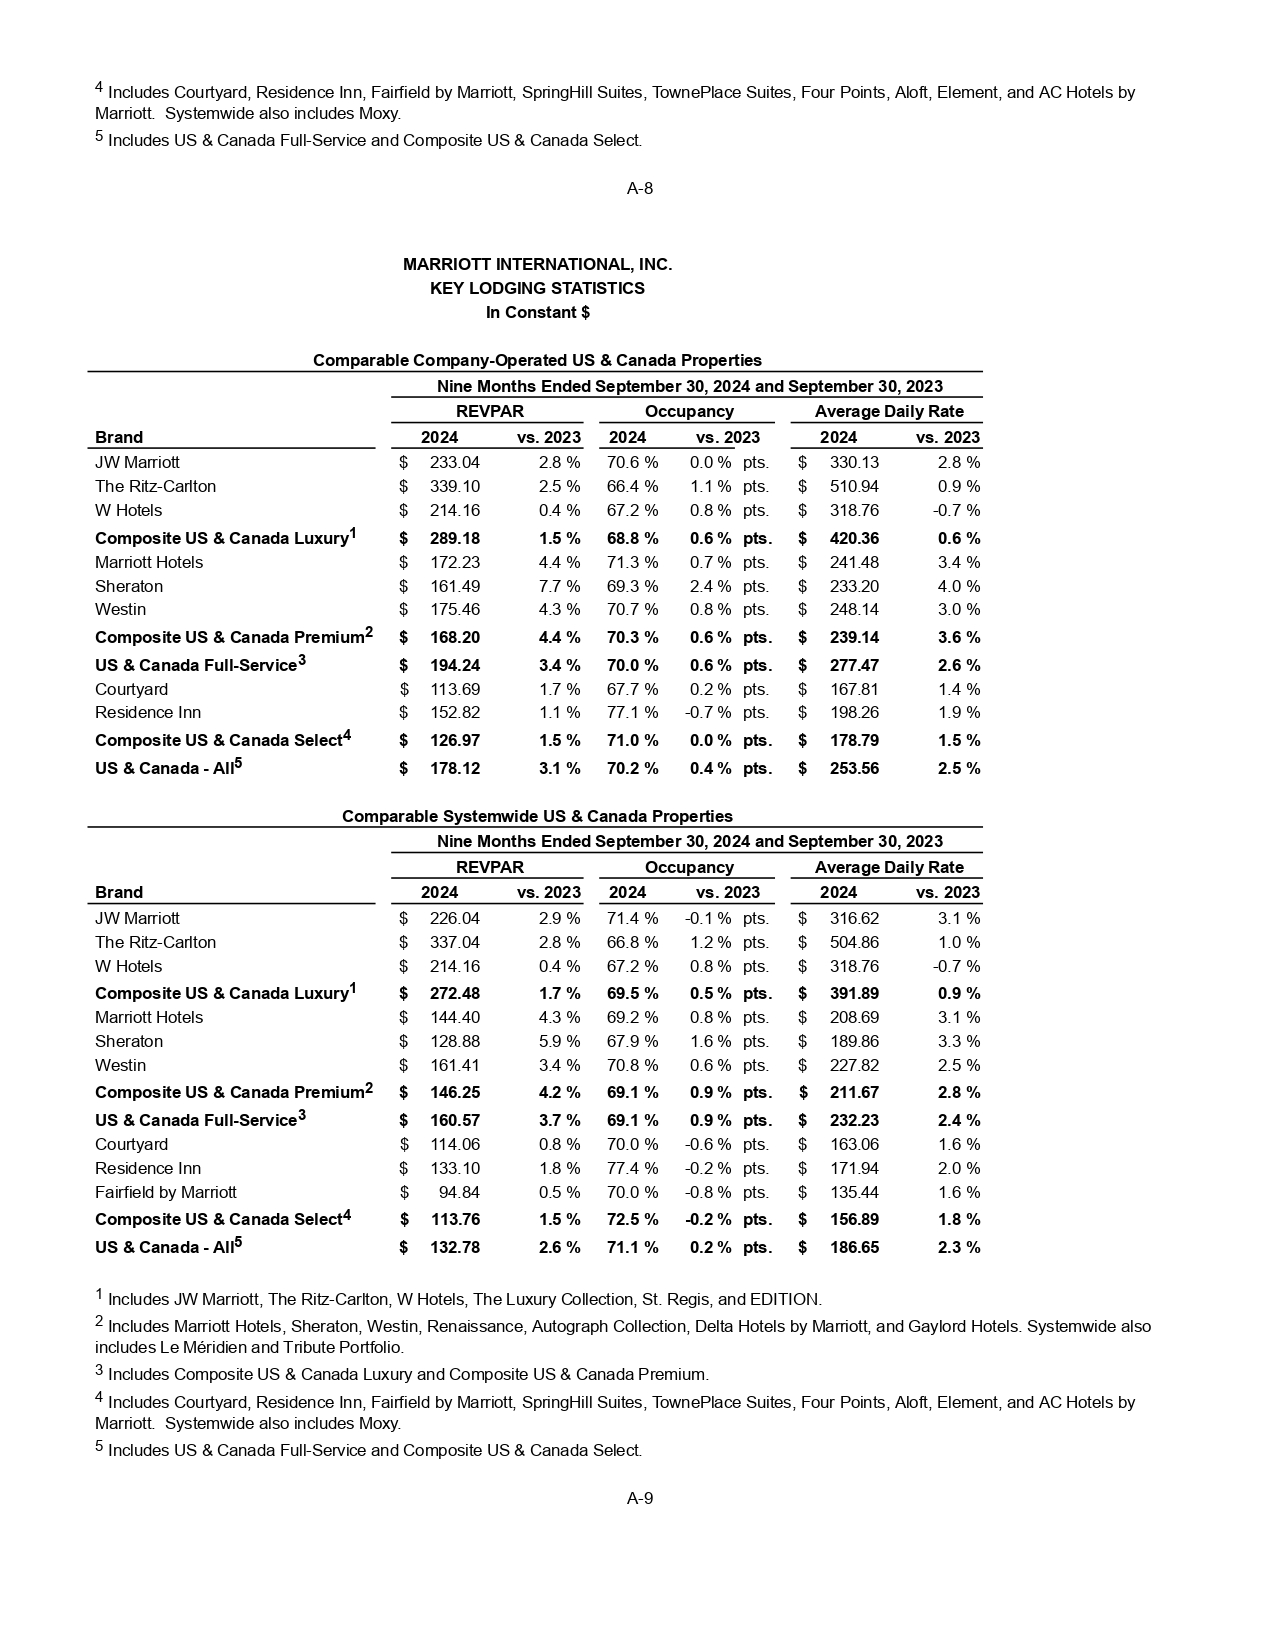

In [22]:
generate_text("/kaggle/input/pdf-files-pages/Marriott International Reports Third Quarter 2024 Results_page-0011.jpg",
             prompt)

## **Example n°10** <a id="example-n10"></a>


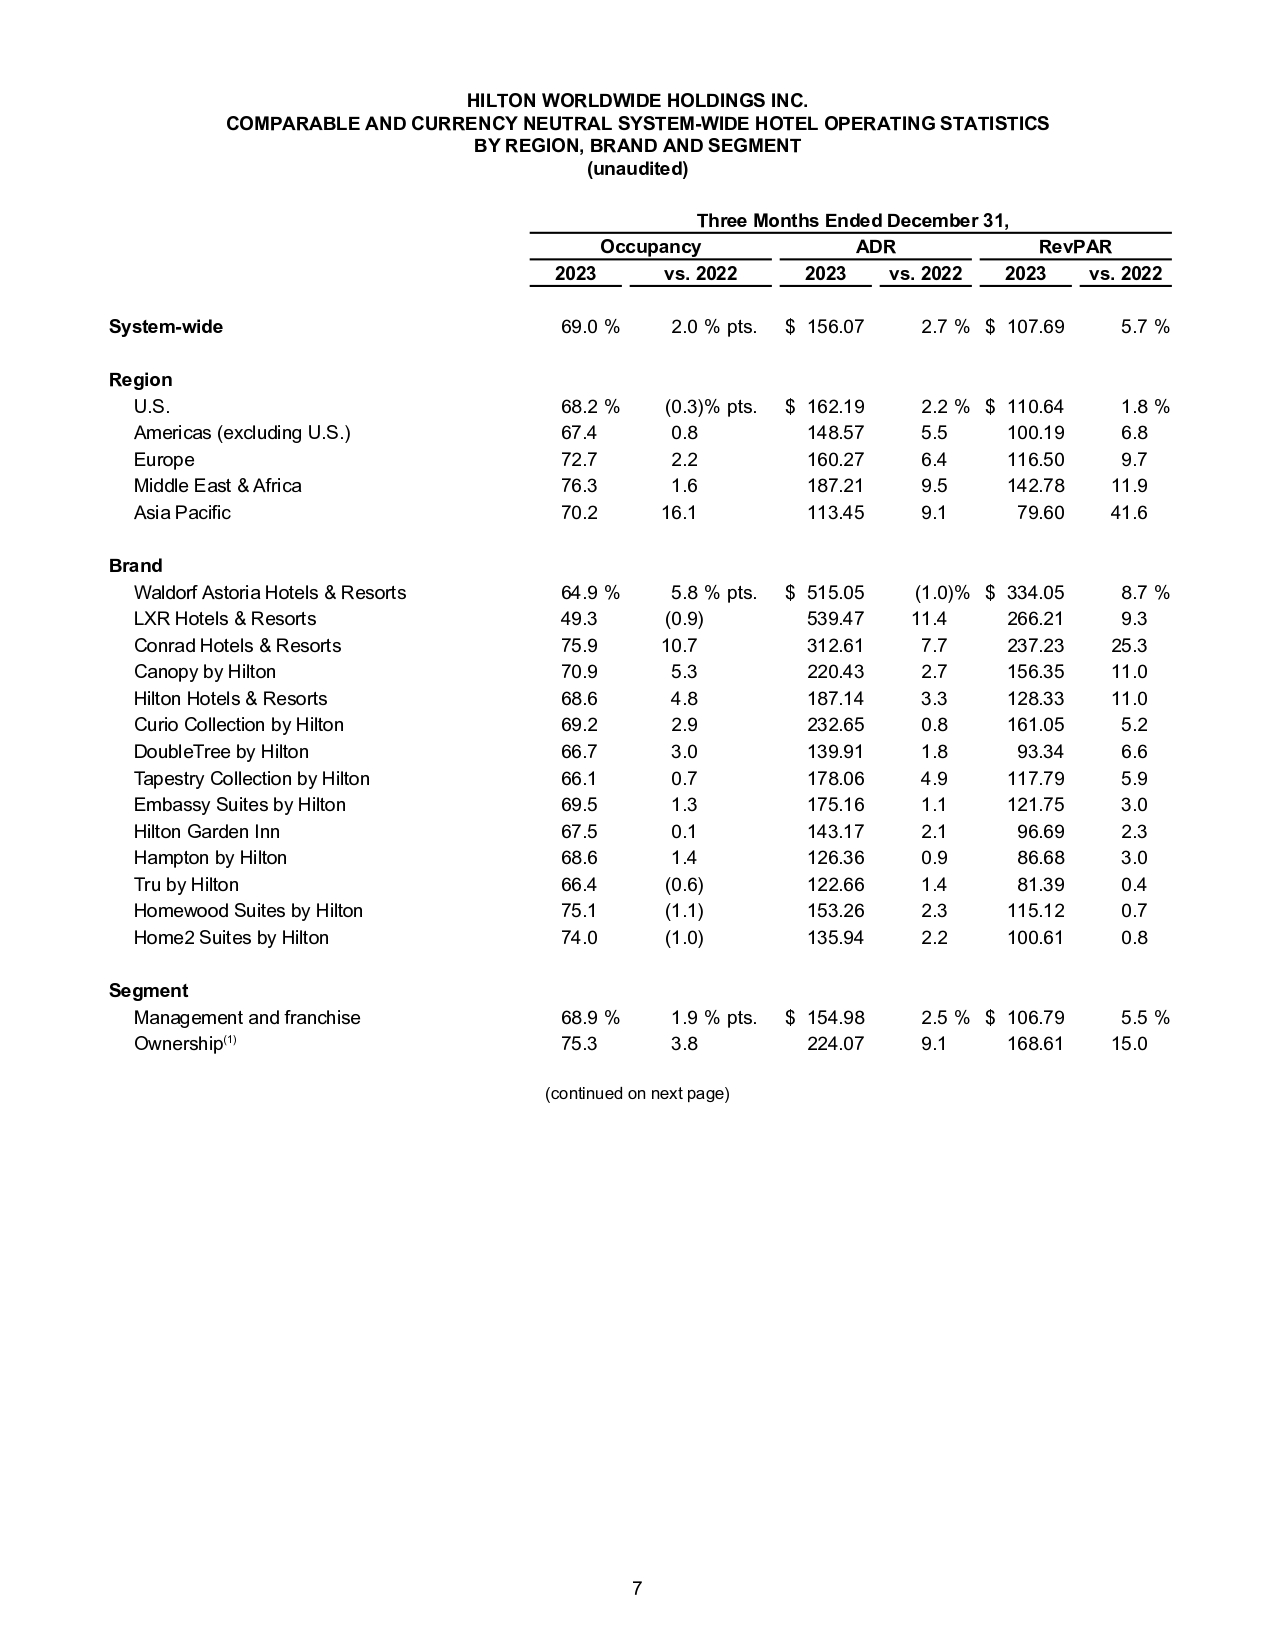

In [24]:
generate_text("/kaggle/input/pdf-files-pages/q4-2023-earnings-release_page-0007.jpg",
             prompt)

## **Example n°11** <a id="example-n11"></a>


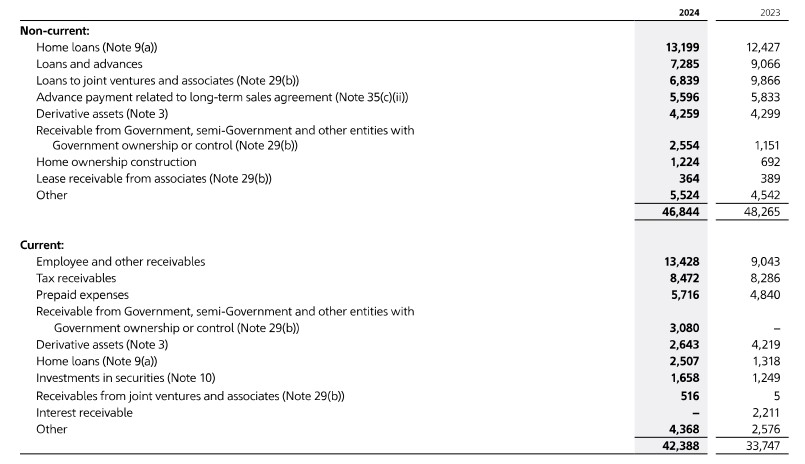

In [25]:
generate_text("/kaggle/input/tables-different-cases-cropped/aramco_table_5.jpg",
             prompt)

# **Conclusion** <a id="conclusion"></a>

<div style="
  background-color: #EF4635;  /* vivid red from Command A Vision palette */
  padding: 25px 30px;
  border-radius: 12px;
  color: white;
  font-family: 'Segoe UI', sans-serif;
  font-size: 16px;
  line-height: 1.6;
  box-shadow: 0 4px 10px rgba(0,0,0,0.15);
  margin: 30px auto;
">
  <p>
    After exploring a wide range of table structures and document layouts, it is clear that 
    <strong>Cohere Command A Vision</strong> excels in the task of table understanding and recognition.
    The model consistently detects table boundaries, interprets cell-level content, and preserves structural relationships with high accuracy.
  </p>
  <p>
    While most extractions were accurate and well-structured, certain complex or irregular table formats still posed challenges, such as multi-level headers, merged cells, or nested tables.
    These edge cases occasionally led to misaligned outputs or partial recognition.
  </p>
  <p>
    Overall, <strong>Command A Vision</strong> proves to be a highly capable model for table-based document analysis,
    offering strong potential for use in automated data extraction pipelines, document intelligence workflows, and enterprise reporting solutions.
  </p>
</div>